In [11]:
import pandas as pd

In [12]:
## Data ingestion steps
df=pd.read_csv("https://raw.githubusercontent.com/Poojaineuron23/Food_delivery/main/Notebooks/Data/delivery.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [13]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_condition    

In [15]:
## check for duplicated records
df.duplicated().sum()

0

In [16]:
###segregate  numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical Columns :", numerical_columns)
print("Categorical Columns :", categorical_columns)

Numerical Columns : Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical Columns : Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [17]:
df[categorical_columns].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [18]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [15]:
df['Type_of_order'].value_counts()

Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

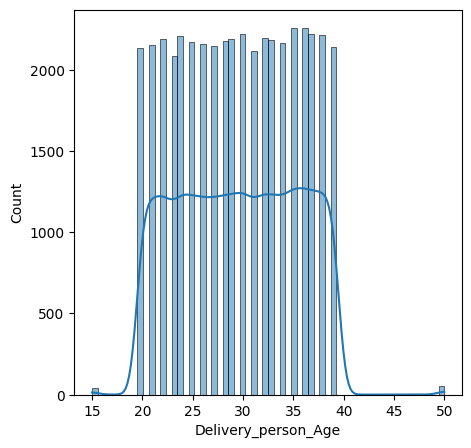

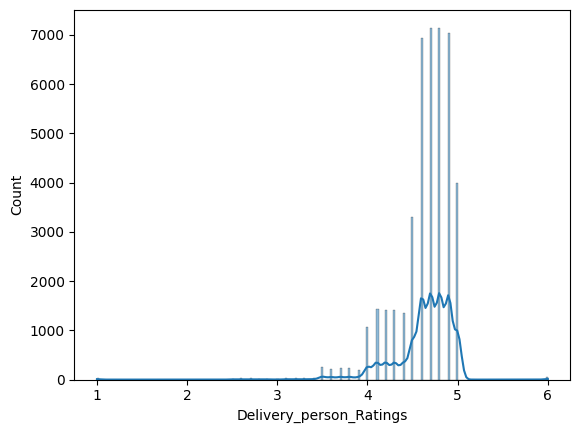

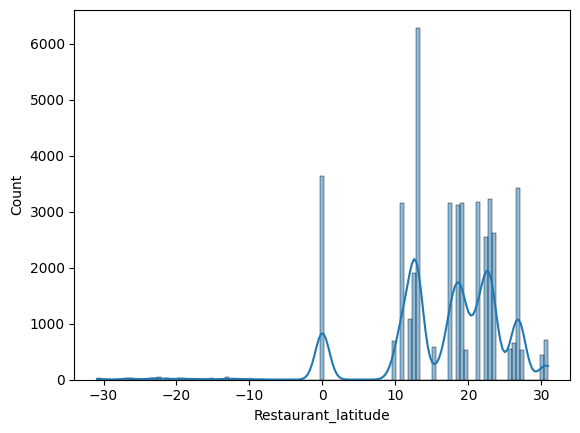

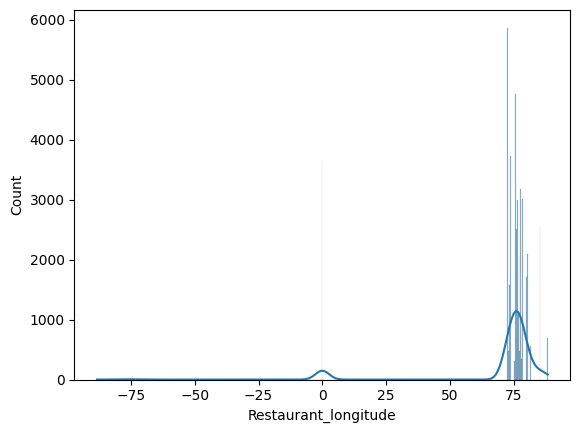

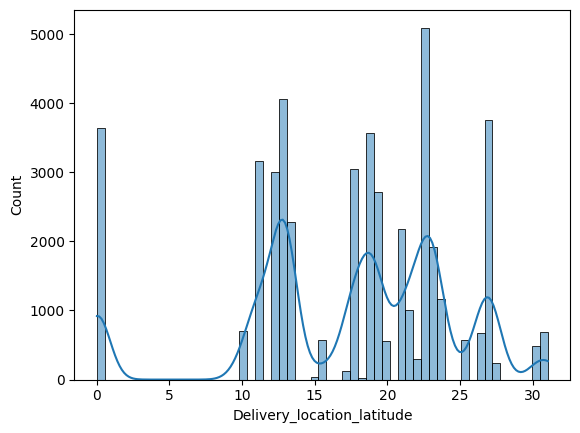

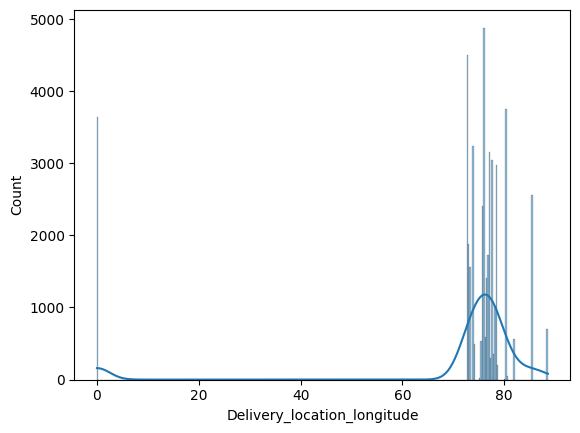

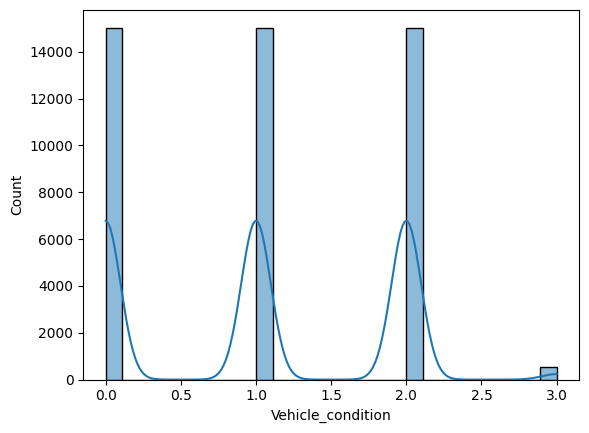

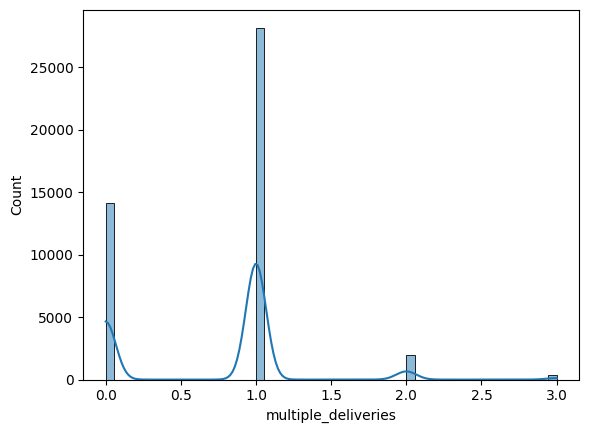

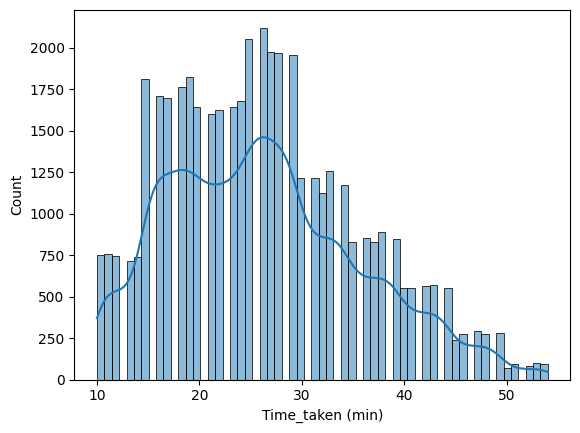

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

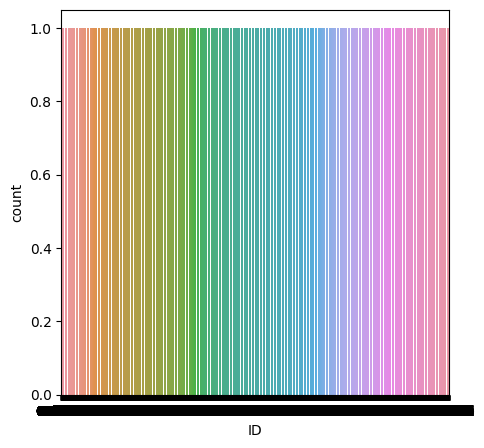

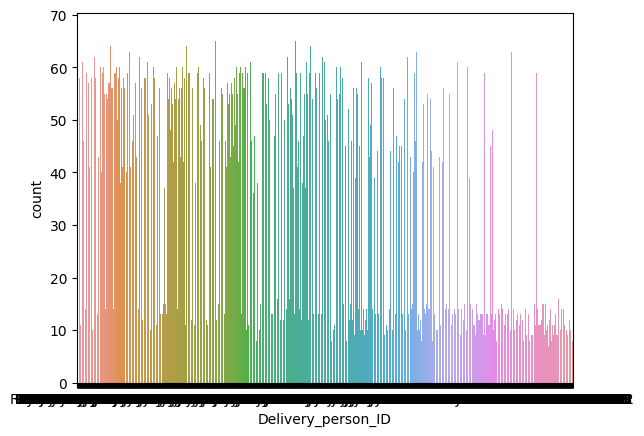

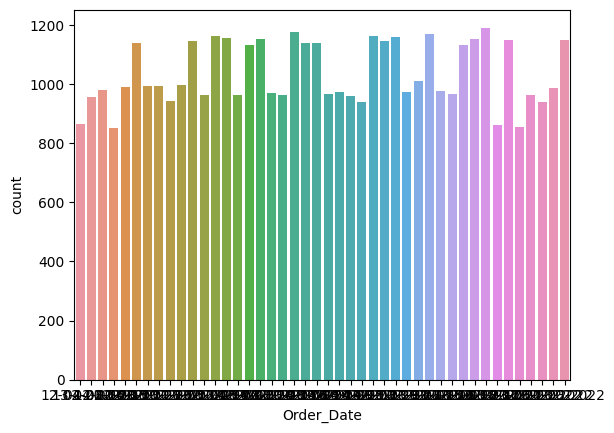

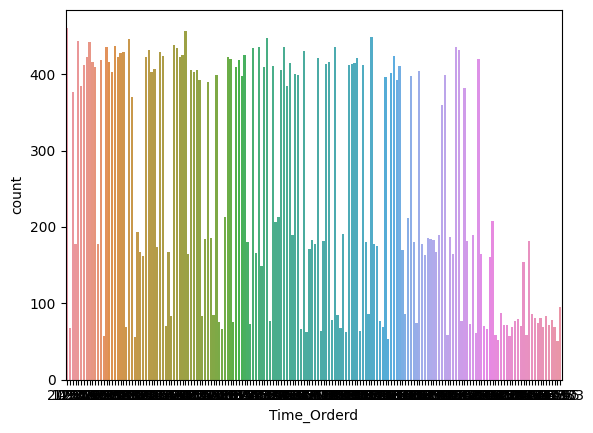

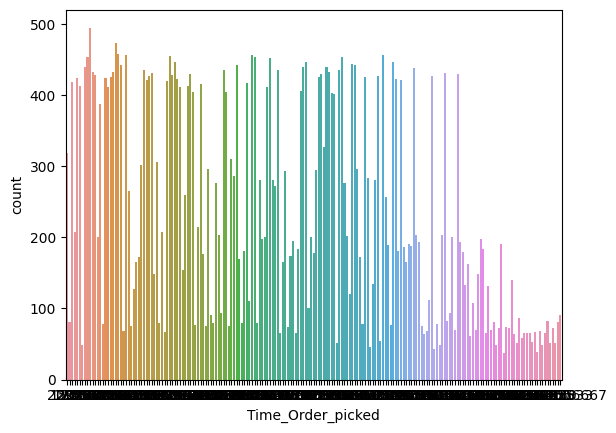

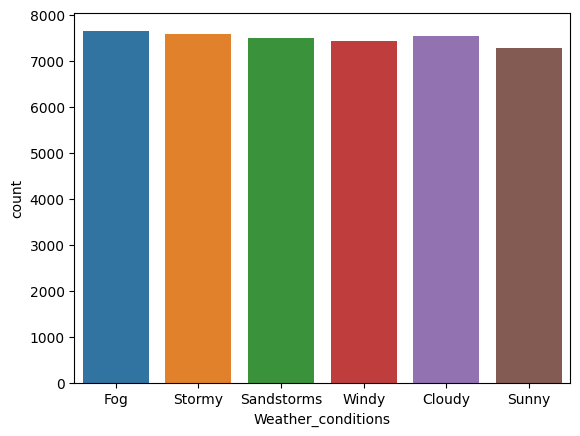

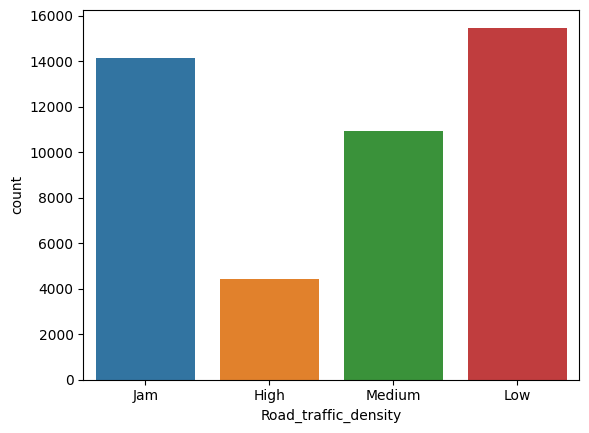

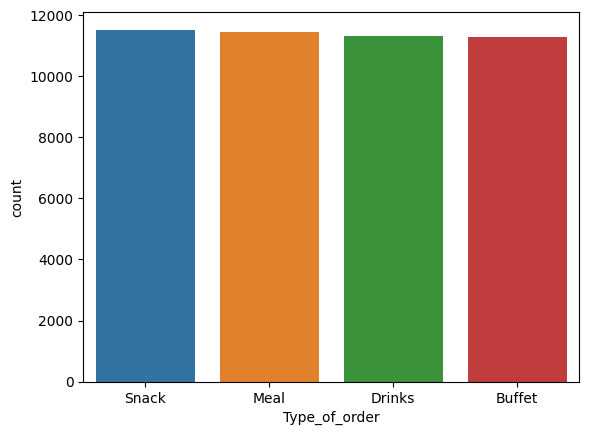

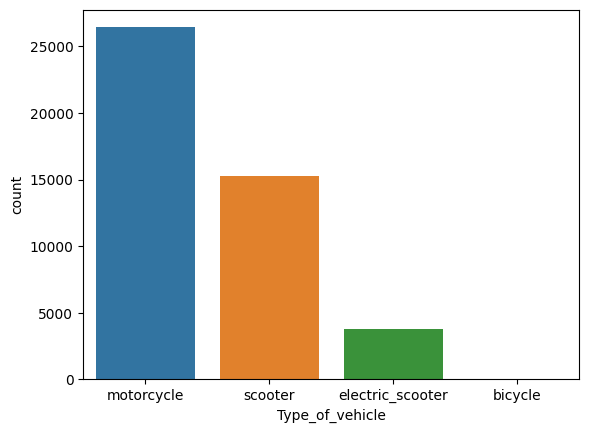

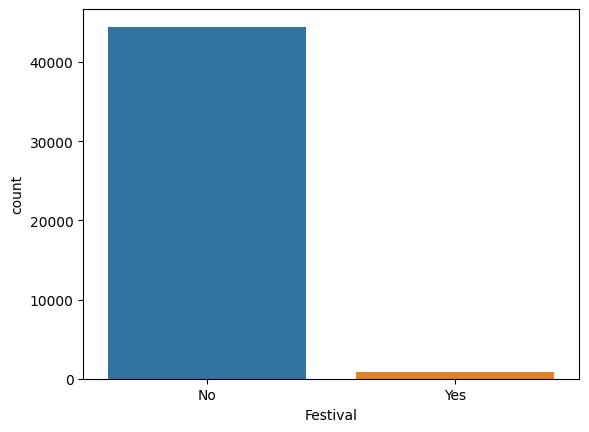

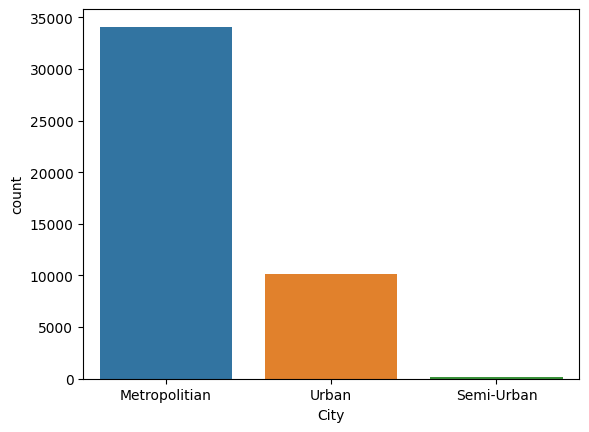

In [23]:
plt.figure(figsize=(5,5))
x=1
for i in categorical_columns:
    
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [17]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

In [25]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [85]:
##Currently we will not execute this
## df= df.drop(labels=['ID', 'Delivery_person_ID',	'Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude'],axis=1)

In [87]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,20,05


In [30]:
df=df.drop(labels=['Order_Date'],axis=1)

In [32]:
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]
df.drop('Time_Orderd',axis=1,inplace=True)

In [33]:
df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]
df.drop('Time_Order_picked',axis=1,inplace=True)

In [34]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,20,05


In [35]:
df.to_csv('delivery_clean.csv')

In [36]:
def value_count_norm(df, feature):
    value_count = df[feature].value_counts()
    value_count_norm_1 = df[feature].value_counts(normalize=True) * 100
    value_count_norm_1_concat = pd.concat([value_count, value_count_norm_1], axis=1)
    value_count_norm_1_concat.columns = ['Count', 'Frequency %']
    return value_count_norm_1_concat

In [37]:
def create_pie_chart(df, feature):
    n = len(value_count_norm(df, feature).index)
    colors = sns.color_palette('pastel')[0:n]
    plt.pie(value_count_norm(df, feature).iloc[:, 1],
            colors = colors, autopct='%1.2f%%', 
            labels=value_count_norm(df, feature).index)
    plt.title('{}'.format(feature))
    return plt.show()

In [74]:

def create_hist_plot(df, feature):
    plt.figure(figsize=(20, 8))
    sns.histplot(df[feature], kde=True)
    plt.title('{}'.format(feature))
    return plt.show()

In [75]:
import numpy as np

def get_info(df, feature):
    if feature in ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']:
        print('Description:\n{}'.format(df[feature].describe()))
        print('*' * 50)
        print('Object type:\n{}'.format(df[feature].dtype))
        print('*' * 50)
        print('Value count:\n{}'.format(value_count_norm(df, feature)))
    elif feature in ['Delivery_person_Age', 'Delivery_person_Ratings']:
        print('Description:\n{}'.format(np.abs(df[feature]).describe()))
        print('*' * 50)
        print('Object type:{}'.format(df[feature].dtype))
    else:
        print('Error')

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_report(df, feature):
        if feature in ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']:
            get_info(df, feature)
            print('*'*50)
            create_pie_chart(df, feature)
        elif feature in ['Delivery_person_Age', 'Delivery_person_Ratings']:
            get_info(df, feature)
            print('*'*50)
            create_hist_plot(df, feature)
        else:
            print("Error")

Description:
count     44968
unique        6
top         Fog
freq       7653
Name: Weather_conditions, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                    Count  Frequency %
Weather_conditions                    
Fog                  7653    17.018769
Stormy               7584    16.865326
Cloudy               7533    16.751912
Sandstorms           7494    16.665184
Windy                7422    16.505070
Sunny                7282    16.193738
**************************************************


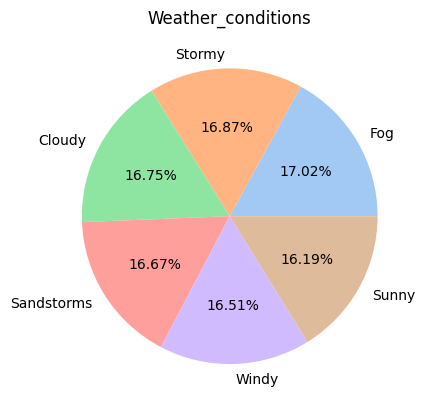

In [52]:
get_report(df, 'Weather_conditions')

Description:
count     44983
unique        4
top         Low
freq      15476
Name: Road_traffic_density, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency %
Road_traffic_density                    
Low                   15476    34.404108
Jam                   14139    31.431874
Medium                10945    24.331414
High                   4423     9.832603
**************************************************


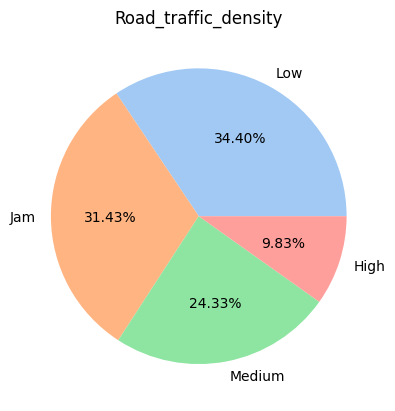

In [53]:
get_report(df, 'Road_traffic_density')

Description:
count    45584.000000
mean         1.023385
std          0.839055
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Vehicle_condition, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                   Count  Frequency %
Vehicle_condition                    
2                  15031    32.974289
1                  15028    32.967708
0                  15005    32.917252
3                    520     1.140751
**************************************************


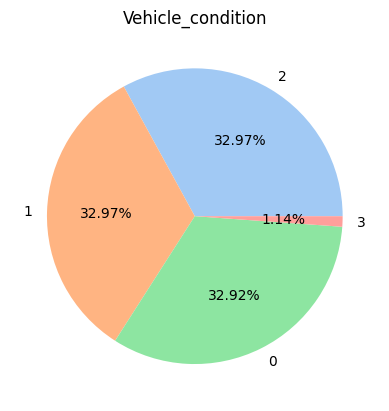

In [54]:
get_report(df, 'Vehicle_condition')

Description:
count     45584
unique        4
top       Snack
freq      11530
Name: Type_of_order, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
               Count  Frequency %
Type_of_order                    
Snack          11530    25.293963
Meal           11456    25.131625
Drinks         11321    24.835469
Buffet         11277    24.738943
**************************************************


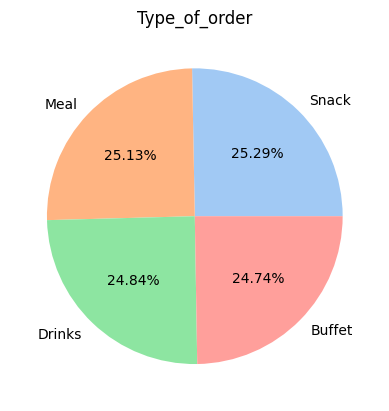

In [55]:
get_report(df, 'Type_of_order')

Description:
count          45584
unique             4
top       motorcycle
freq           26429
Name: Type_of_vehicle, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                  Count  Frequency %
Type_of_vehicle                     
motorcycle        26429    57.978677
scooter           15273    33.505177
electric_scooter   3814     8.366971
bicycle              68     0.149175
**************************************************


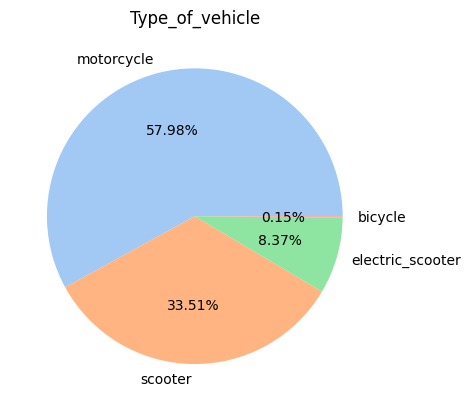

In [56]:
get_report(df, 'Type_of_vehicle')

Description:
count    44591.000000
mean         0.744635
std          0.572510
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: multiple_deliveries, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
                     Count  Frequency %
multiple_deliveries                    
1.0                  28151    63.131574
0.0                  14094    31.607275
2.0                   1985     4.451571
3.0                    361     0.809580
**************************************************


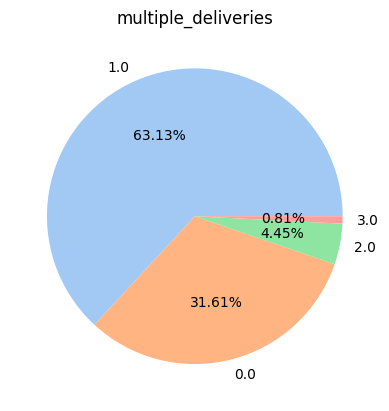

In [57]:
get_report(df, 'multiple_deliveries')

Description:
count     45356
unique        2
top          No
freq      44460
Name: Festival, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
          Count  Frequency %
Festival                    
No        44460    98.024517
Yes         896     1.975483
**************************************************


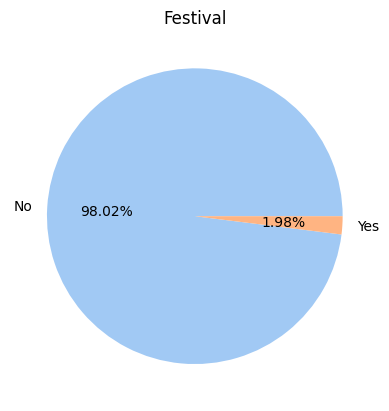

In [58]:
get_report(df, 'Festival')

Description:
count             44384
unique                3
top       Metropolitian
freq              34087
Name: City, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
               Count  Frequency %
City                             
Metropolitian  34087    76.800198
Urban          10133    22.830299
Semi-Urban       164     0.369503
**************************************************


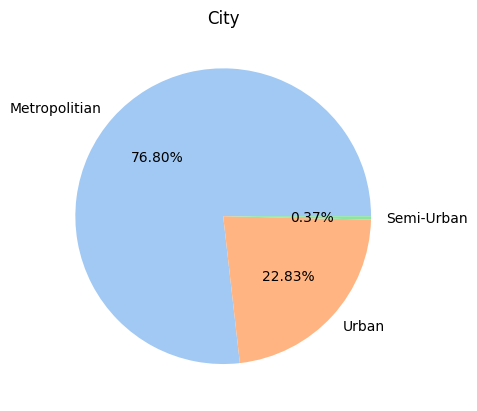

In [59]:
get_report(df, 'City')

Description:
count    43730.000000
mean        29.566911
std          5.815064
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64
**************************************************
Object type:float64
**************************************************


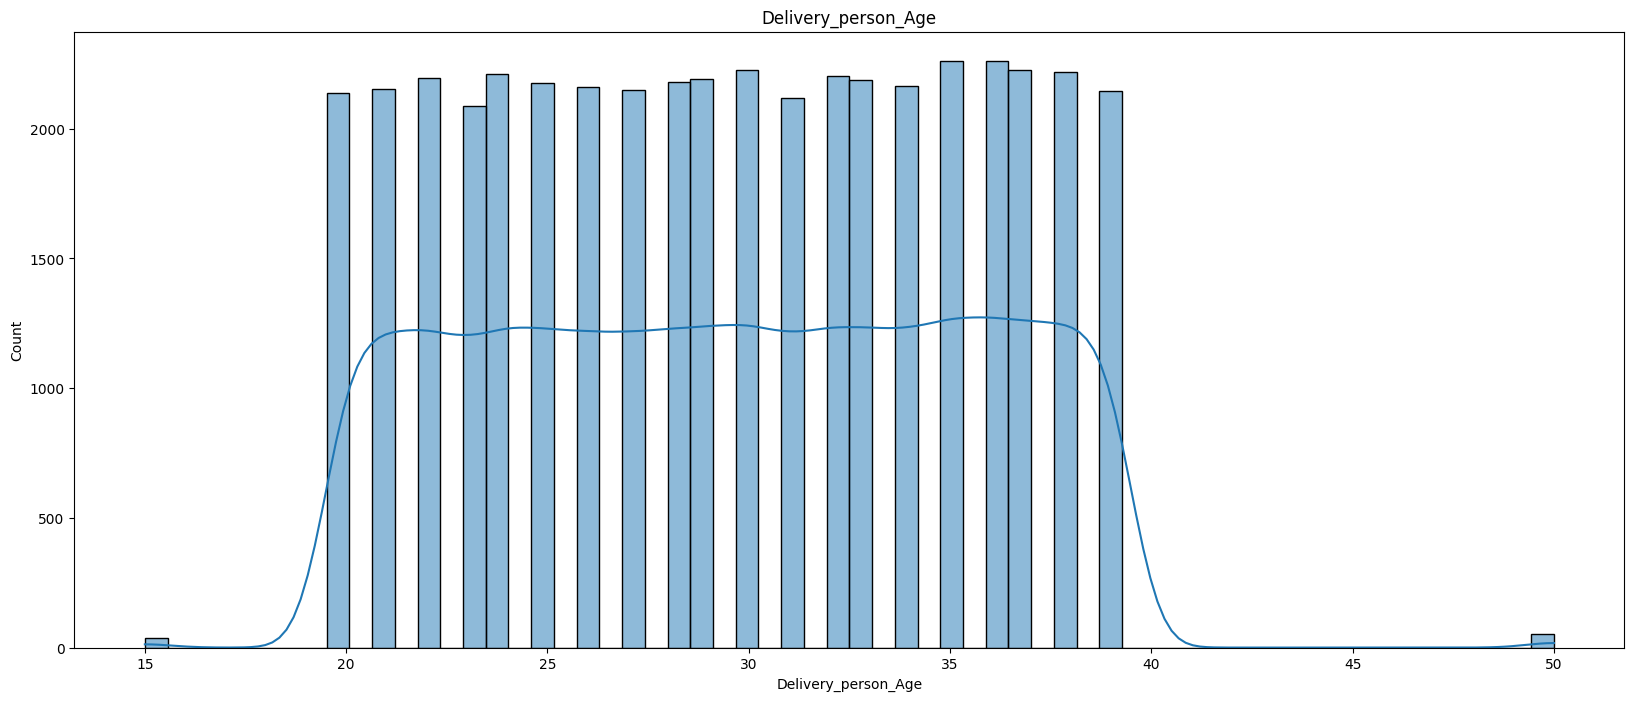

In [77]:
get_report(df, 'Delivery_person_Age')

Description:
count    43676.000000
mean         4.633774
std          0.334744
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64
**************************************************
Object type:float64
**************************************************


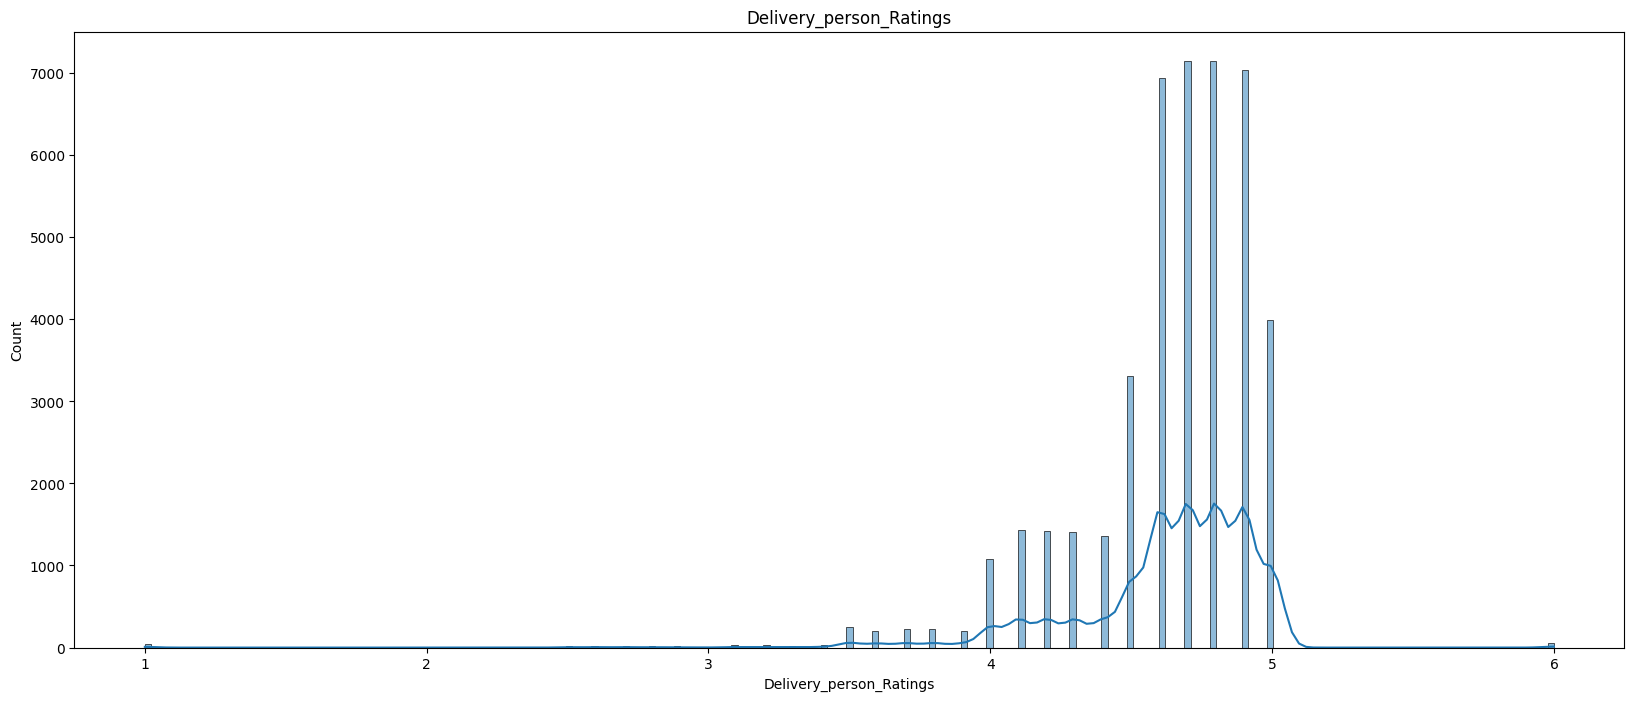

In [78]:
get_report(df, 'Delivery_person_Ratings')

In [92]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

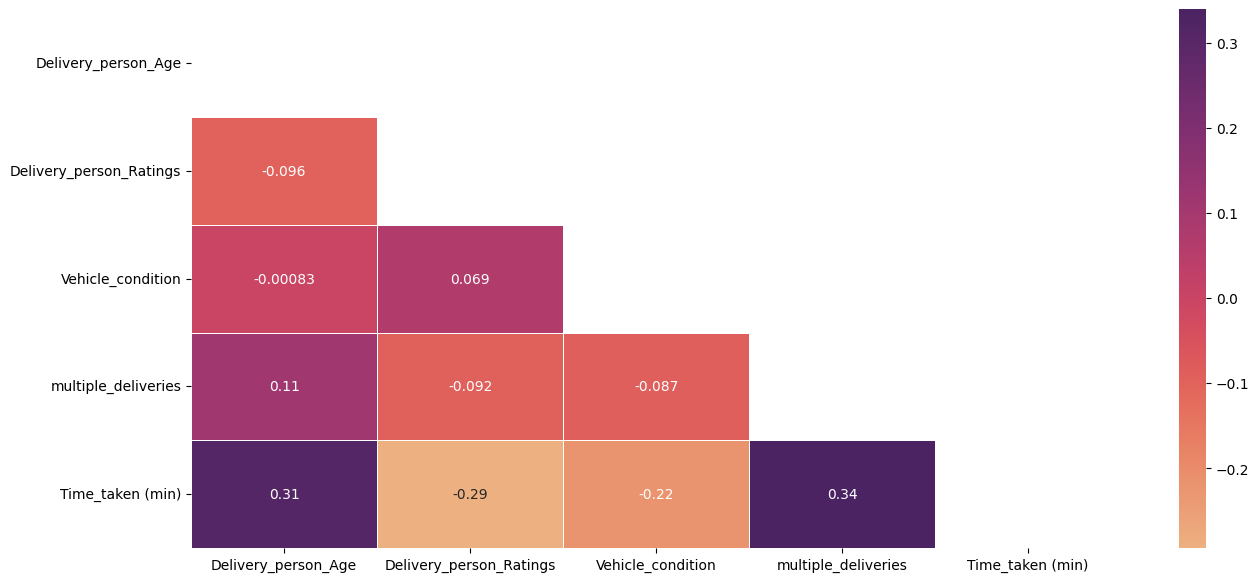

In [96]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=np.number)

# Create the correlation heatmap
plt.figure(figsize=(15, 7))
mask = np.zeros_like(numeric_columns.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numeric_columns.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

# Display the plot
plt.show()

/config/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


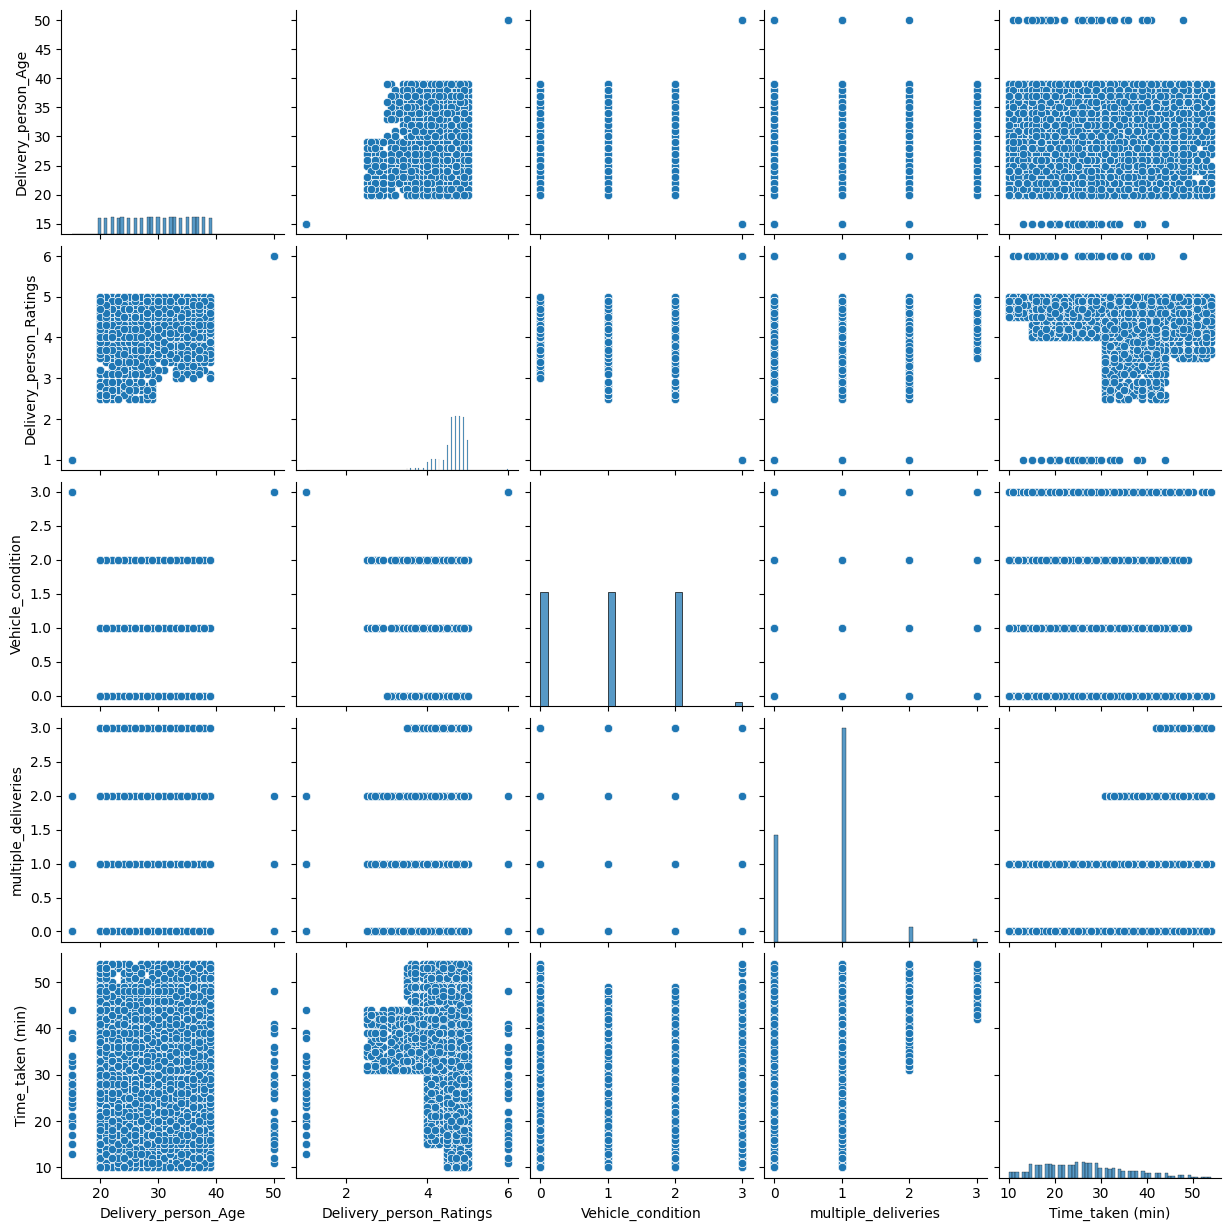

In [97]:
sns.pairplot(df)